<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ivette Landaverde Mercado, Diego Pintor Ochoa.

**Fecha:** XX de marzo del 2021.

**Expediente** : if722626, if726622.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/PintorOD1997/ProyectoConjunto_LandaverdeI_PintorD

# Proyecto TEMA-2

### 1.1 Título del trabajo:



<div style="text-align:center"><span style="color:#154898; font-family: 'Bebas Neue'; font-size: 4em;">  Febrero loco y marzo otro poco </span></div> </p>



<img style="float: center; margin: 0px 0px 15px 230px;" src="https://di-uploads-pod14.dealerinspire.com/toyotaoforlando/uploads/2019/08/driving-in-the-rain-1024x683.jpg" width="500px" height="300px" />


## <font color='navy'> 1.2 Objetivos.
#### 1.1 Objetivo general:
    
- El objetivo de este proyecto es simular el comportamiento de los patrones climáticos de las cuatro estaciones del año a través de las siguientes variables: húmedad, presión, temperatura, presión del viento y velocidad del viento para posteriormente calcular la probabilidad de lluvia en Seattle.
    
#### 1.2 Objetivos específicos:
- Definir estaciones del año, en las que se puedan encuadrar patrones climáticos para la ciudad de Seattle. 
- Correlacionar la lluvia con otros indicadores como la humedad, dirección del viento, velocidad del viento y temperatura.
- Simular escenarios para cada una de las cuatro estaciones del año.
- Enunciar la probabilidad de que llueva en una estación dada del año para Seattle.

Referencia:
- https://es.slideshare.net/rosbur/metodologia-objetivos-generales-y-especficos


## <font color='navy'> 1.3 Definición del problema

Queremos predecir la probabilidad de lluvia ya que se simularemos que tenemos un autolavado en la ciudad de Seattle que ofrece garantías en caso de lluvia. 
> La premisa es: **si acudes a lavar tu carro y al día siguiente llueve, tu siguiente lavada es gratis.**

Sería sencillo simplemente no ofrecer la garantía en las temporadas de lluvía cuando la probabilidad de que llueva es especialmente alta por lo cual no nos convendría, sin embargo, las lluvias ya no son tan estables y no son exclusivas de una temporada y esto se debe al cambio climático que atribuye un factor estócastico; ahora puede llover en cualquier mes y época del año.

Nosotros usaremos datos relativamente recientes para reducir la probabilidad de error y por lo tanto conocer en que meses no deberíamos ofrecer la garantía de lavado gratis post-lluvia.


¿Cómo afecta el cambio climático a la lluvia?


Uno de los factores más críticos a la hora de determinar el impacto del cambio climático es el cambio en la lluvia y otros tipos de precipitaciones. La lluvia se ha vuelto mucho más difícil de predecir que la temperatura, pero existen algunas declaraciones que los científicos pueden asegurar en el futuro cercano.


Una atmósfera más cálida puede almacenar mayor cantidad de humedad, y la cantidad de vapor de agua global se incrementa aproximadamente en un 7% por cada grado centígrado de calentamiento extra. Cómo se traduce esto a cambios en las precipitaciones globales es poco claro, pero el volumen total de precipitaciones puede incrementarse aproximadamente de un 1% a un 2% por grado centígrado de calentamiento.


Existe evidencia para mostrar que las regiones que son húmedas se van a volver más húmedas, pero los detalles de que tan más húmedo se van a volver son más difíciles de asegurar. Son estos cambios en los patrones climáticos que harán la predicción de lluvia particularmente difícil. (Met 2011)




Con la mayor cantidad de días lluviosos que otra gran ciudad americana, Seattle tiene una reputación de precipitaciones frecuentes. En promedio, por año, llueven 150 días. Sin embargo, debido a que las precipitaciones en Seattle suelen ser lloviznas ligeras, Seattle recibe menos precipitaciones totales que otras ciudades. 
En noviembre, Seattle promedia más precipitaciones que otras ciudades grandes; también los inviernos son particularmente húmedos. Los meses más húmedos son noviembre, diciembre y enero. (NOAA 2014)




## <font color='navy'>  1.4 Nodos y variables: 
Tenemos un conjunto de datos sobre distintos atributos climáticos de 36 ciudades de las cuales nos enfocaremos específicamente en Seattle.

Las mediciones están hechas por hora e incluyen:

- Húmedad

- Presión

- Temperatura

- Presión del viento
    
- Velocidad del viento

- Descripción del clima

Además contamos con información general de las ciudades: en que país se encuentran, su latitud y longitud.


## <font color='navy'> 1.5 Definición de hipótesis y supuestos
    
### Supuestos:

- Todos los datos son correctos y con la misma precisión de medición 
- Los datos fueron medidos con la misma frecuencia


### Hipótesis:
 
- Podemos predecir la probabilidad de lluvía a través de la correlación de otras variables



## <font color='navy'> Diagrama:
    
El siguiente diagrama muestra como vamos a manejar las variables para para calcular la probabilidad de lluvia.

![alt text](diagrama.png "diagrama")

## <font color='navy'>  1.6 Obtención de bases de datos
La base de datos la obtuvimos de la comunidad Kaggle, la información ya está acomodada con el mismo eje común (tiempo) y la misma perioricidad (por hora).
Cada atributo está en un archivo distinto en donde las filas contienen el eje del tiempo y las columnas son las diferentes ciudades para cada archivo.
 
> Fuente: https://www.kaggle.com/selfishgene/historical-hourly-weather-data/code

Estos son los datos a utilizar:

In [6]:
#Librerías:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
#Función histograma:
def plot_histogram_discrete(distribucion:'distribución a graficar histograma',
                            xlabel:'x label',
                            ylabel: 'y label',
                            title: 'title'):
    '''Función para graficar el histograma de una distribución discreta'''
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion))) 
    plt.bar(list(set(distribucion)),y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [7]:
data=pd.read_csv("city_attributes.csv")
data.head(2)

,City,Country,Latitude,Longitude
0,Vancouver,Canada,49.249660,-123.119339
1,Portland,United States,45.523449,-122.676208


In [8]:
data2=pd.read_csv("humidity.csv")
humedad = data2["Seattle"].dropna()
data2.sample(2)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
9244,2013-10-21 16:00:00,93.0,100.0,88.0,93.0,89.0,93.0,14.0,23.0,26.0,...,36.0,37.0,66.0,55.0,83.0,50.0,89.0,100.0,100.0,93.0
41851,2017-07-11 07:00:00,82.0,58.0,93.0,72.0,88.0,69.0,29.0,28.0,36.0,...,78.0,88.0,82.0,88.0,80.0,58.0,26.0,66.0,66.0,58.0


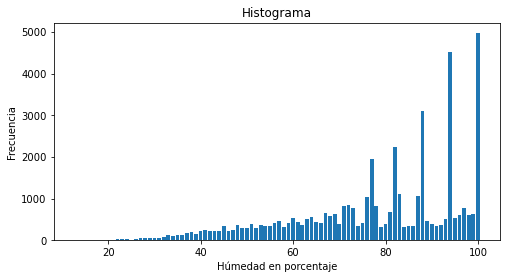

In [9]:
#Húmedad:
plot_histogram_discrete(humedad, 'Húmedad en porcentaje', 'Frecuencia', 'Histograma')

In [10]:
data3=pd.read_csv("pressure.csv")
presion = data3.Seattle.dropna()
data3.sample(2)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
17761,2014-10-11 13:00:00,1015.0,1031.0,1029.0,1029.0,1027.0,1026.0,1028.0,1028.0,1035.0,...,1031.0,1018.0,1020.0,1033.0,992.0,1013.0,1010.0,1012.0,1012.0,1026.0
22388,2015-04-22 08:00:00,1016.0,1034.0,1023.0,1032.0,1025.0,1025.0,1020.0,1022.0,1020.0,...,1022.0,1008.0,1009.0,1021.0,1005.0,1021.0,985.0,1021.0,1004.0,1026.0


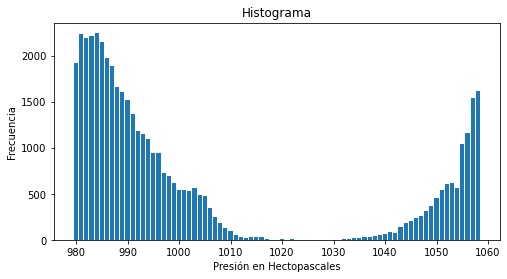

In [11]:
#Presión:
plot_histogram_discrete(presion, 'Presión en Hectopascales', 'Frecuencia', 'Histograma')

In [15]:
data4=pd.read_csv("temperature.csv")
temp = data4.Seattle.dropna()-273.15
data4.sample(2)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
5377,2013-05-13 13:00:00,287.25,288.92,284.89,287.82,289.35,288.20,292.60,293.10,280.14,...,287.94,288.48,285.10,288.83,293.600,297.19,303.6455,294.00,294.00,293.83
35902,2016-11-05 10:00:00,284.00,285.17,283.31,286.03,288.81,287.39,288.86,289.39,282.46,...,275.54,276.80,275.12,272.84,294.651,296.15,295.7400,299.12,298.86,296.15


In [16]:
data5=pd.read_csv("weather_description.csv")
weather_desc = data5.Seattle.dropna()
data5.sample(2)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
15289,2014-06-30 13:00:00,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,scattered clouds,sky is clear,overcast clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear
40234,2017-05-04 22:00:00,sky is clear,sky is clear,light rain,proximity thunderstorm,haze,haze,sky is clear,sky is clear,few clouds,...,broken clouds,scattered clouds,overcast clouds,broken clouds,sky is clear,few clouds,sky is clear,sky is clear,sky is clear,few clouds


In [17]:
data6=pd.read_csv("wind_direction.csv")
wind_dir = data6.Seattle.dropna()
data6.sample(2)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
10834,2013-12-26 22:00:00,102.0,311.0,315.0,349.0,180.0,229.0,94.0,325.0,136.0,...,307.0,300.0,241.0,236.0,66.0,0.0,72.0,121.0,119.0,68.0
16480,2014-08-19 04:00:00,240.0,300.0,231.0,239.0,186.0,189.0,190.0,225.0,141.0,...,244.0,10.0,360.0,327.0,230.0,130.0,40.0,0.0,0.0,261.0


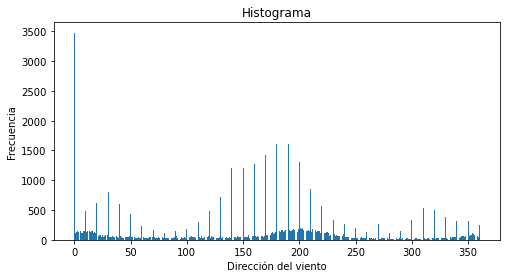

In [18]:
#Dirección del viento:
plot_histogram_discrete(wind_dir, 'Dirección del viento', 'Frecuencia', 'Histograma')

In [19]:
data7=pd.read_csv("wind_speed.csv")
wind_speed = data7.Seattle.dropna()
data7.sample(2)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
15671,2014-07-16 11:00:00,4.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0,6.0,...,1.0,4.0,3.0,1.0,3.0,5.0,7.0,5.0,1.0,1.0
45252,2017-11-30 00:00:00,NaN,1.0,NaN,4.0,1.0,2.0,1.0,2.0,2.0,...,4.0,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


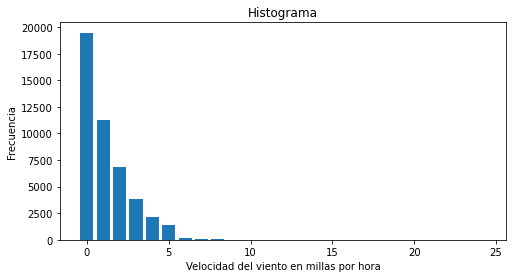

In [20]:
#Velocidad del viento:
plot_histogram_discrete(wind_speed, 'Velocidad del viento en millas por hora', 'Frecuencia', 'Histograma')

## <font color='navy'> Selección de Variables Aleatorias

In [21]:
#Temperatura, medida en grados celsius
#Humedad en porcentaje 0 - 100
#Presión, dada en Hectopascales
#Velocidad del viento en millas por hora
#Dirección del viento en grados (0 - 360)
#plt.hist(wind_speed)
#Distribución normal para la temperatura, con características
temp_mean = temp.mean()
temp_sd = temp.std()
temp_sim = np.random.normal(loc=temp_mean,scale=temp_sd,size=12000)
#Distribución desconocida para la humedad(pedir ayuda), con características
hum_mean = humedad.mean()
humedad_sim = st.expon(loc=0,scale=hum_mean).rvs(size=10000, random_state=123)
#Distribución normal para la presión
presion_mean = presion.mean()
presion_sd = presion.std()
presion_sim = st.norm(loc=presion_mean,scale=presion_sd).rvs(size=10000)
#Distribución exponencial para la velocidad del viento, con características
wS_mean = wind_speed.mean()
wS_sd = wind_speed.std()
wS_sim = st.expon(loc=0,scale=wS_mean).rvs(size=45000, random_state=69)

In [22]:
#Realizando pruebas de intervalo de confianza para la media de las distribuciones normales simuladas
def intervalo_confianza(m:"Media de la distribución original",sim:"Variable simulada",c="Intervalo de confianza"):
    """
    Esta función crea una estimación del intervalo de confianza para la media de la variable simulada, y genera prueba de
    hipótesis, además de aceptarla o rechazarla, para una variable aleatoria normal. Imprime el intervalo de confianza para
    t-Student, normal, la media calculada de la variable simulada, una media rechazable, el estadístico de student, el valor
    de p para la prueba, la región de rechazo y el cálculo del estadístico de prueba teórico (uf!)
    """
    N = len(sim)
    i_t = st.t.interval(c, len(sim)-1, loc=np.mean(sim), scale=st.sem(sim))
    i_n = st.norm.interval(c, loc=np.mean(sim), scale=st.sem(sim))
    media_calc = np.mean(sim)
    # prueba de hipotesis para H0= mu=media2
    ho = st.ttest_1samp(sim, media_calc)
    # Calculamos el estadístico normalizado
    t = (np.mean(sim) - media_calc)/(np.std(sim) / np.sqrt(N))
    # Cálculo de la región de rechazo
    cuantil = st.t(N-1).cdf(c/2)
    print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s     ' %(c,i_t))
    print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(c,i_n))
    print('Media calculada' ,np.mean(sim))
    print('La prueba de hipótesis arroja como resultado\n',ho)
    print('Cálculo del estadístico de prueba teórico=', t)
    print(f'Región de rechazo = (t<{-cuantil}) U (t>{cuantil})')
    if ho.pvalue > c:
        print("Se acepta la hipótesis nula, la media es igual a",media_calc,"con un",c,"% de confianza.")
    else:
        print("Se rechaza la hipótesis nula. La media es diferente de",media_calc)
    

In [23]:
intervalo_confianza(temp_mean,temp_sim,.95)

Con una confianza de 0.95 la media estará en el intervalo t,
 (11.005326971459517, 11.239075403889139)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (11.005338760790574, 11.239063614558082)
Media calculada 11.122201187674328
La prueba de hipótesis arroja como resultado
 Ttest_1sampResult(statistic=0.0, pvalue=1.0)
Cálculo del estadístico de prueba teórico= 0.0
Región de rechazo = (t<-0.6826021906405915) U (t>0.6826021906405915)
Se acepta la hipótesis nula, la media es igual a 11.122201187674328 con un 0.95 % de confianza.


## <font color='navy'> Definición de estaciones:

Para obtener resultados más precisos realizaremos nuestro análisis por estaciones del año, las cuales son: primavera, verano otoño e invierno.

#### <font color='green'> Temporada 1: Primavera 
> La temporada de ptimavera comienza el 20 de marzo y termina el 21 de junio.

In [ ]:
#Humedad:
humedad2 = data2.dropna()
primavera_humedad=humedad2
primavera_humedad=primavera_humedad.append(humedad2['datetime']>='2012-20-03') & (humedad2['datetime']<'2012-21-06') 
primavera_humedad=primavera_humedad.append(humedad2['datetime']>='2013-20-03') & (humedad2['datetime']<'2013-21-06') 
primavera_humedad=primavera_humedad.append(humedad2['datetime']>='2014-20-03') & (humedad2['datetime']<'2014-21-06') 
primavera_humedad=primavera_humedad.append(humedad2['datetime']>='2015-20-03') & (humedad2['datetime']<'2015-21-06') 
primavera_humedad=primavera_humedad.append(humedad2['datetime']>='2016-20-03') & (humedad2['datetime']<'2016-21-06') 
primavera_humedad=primavera_humedad.append(humedad2['datetime']>='2017-20-03') & (humedad2['datetime']<'2017-21-06') 
primavera_humedad_seattle = primavera_humedad.Seattle
#Presión:

#Temperatura: 

#Weather description:

#Presión del viento:



#### <font color='green'> Temporada 2: Verano 
> La temporada de verano comienza el 21 de junio y termina el 22 de septiembre.

In [ ]:
#Humedad
verano_humedad=humedad2
verano_humedad=verano_humedad.append(humedad2['datetime']>='2012-21-06') & (humedad2['datetime']<'2012-22-09') 
verano_humedad=verano_humedad.append(humedad2['datetime']>='2013-20-06') & (humedad2['datetime']<'2013-22-09') 
verano_humedad=verano_humedad.append(humedad2['datetime']>='2014-20-06') & (humedad2['datetime']<'2014-22-09') 
verano_humedad=verano_humedad.append(humedad2['datetime']>='2015-20-06') & (humedad2['datetime']<'2015-22-09') 
verano_humedad=verano_humedad.append(humedad2['datetime']>='2016-20-06') & (humedad2['datetime']<'2016-22-09') 
verano_humedad=verano_humedad.append(humedad2['datetime']>='2017-20-06') & (humedad2['datetime']<'2017-22-09') 
verano_humedad_seattle = verano_humedad.Seattle
#Presión:

#Temperatura: 

#Weather description:

#Presión del viento:

#Velocidad del viento:

#### <font color='green'> Temporada 3: Otoño 
> La temporada de otoño comienza el 22 de septiembre y termina el 21 de diciembre.

In [ ]:
#Humedad
otoño_humedad=humedad2
otoño_humedad=otoño_humedad.append(humedad2['datetime']>='2012-22-09') & (humedad2['datetime']<'2012-21-12') 
otoño_humedad=otoño_humedad.append(humedad2['datetime']>='2013-22-09') & (humedad2['datetime']<'2013-21-12') 
otoño_humedad=otoño_humedad.append(humedad2['datetime']>='2014-22-09') & (humedad2['datetime']<'2014-21-12') 
otoño_humedad=otoño_humedad.append(humedad2['datetime']>='2015-22-09') & (humedad2['datetime']<'2015-21-12') 
otoño_humedad=otoño_humedad.append(humedad2['datetime']>='2016-22-09') & (humedad2['datetime']<'2016-21-12') 
otoño_humedad=otoño_humedad.append(humedad2['datetime']>='2017-22-09') & (humedad2['datetime']<'2017-28-10') #db termina el 28/10/1017
otoño_humedad_seattle = otoño_humedad.Seattle
#Presión:

#Temperatura: 

#Weather description:

#Presión del viento:

#Velocidad del viento:

#### <font color='green'> Temporada 4: Invierno 
> La temporada de otoño comienza el 21 de diciembre y termina el 20 de marzo.

In [ ]:
#Humedad
invierno_humedad=humedad2
invierno_humedad=invierno_humedad.append(humedad2['datetime']>='2012-21-12') & (humedad2['datetime']<='2012-31-12') or (humedad2['datetime']>='2012-01-01') & (humedad2['datetime']<'2012-20-03') 
invierno_humedad=invierno_humedad.append(humedad2['datetime']>='2013-21-12') & (humedad2['datetime']<='2013-31-12') or (humedad2['datetime']>='2013-01-01') & (humedad2['datetime']<'2013-20-03') 
invierno_humedad=invierno_humedad.append(humedad2['datetime']>='2014-21-12') & (humedad2['datetime']<='2014-31-12') or (humedad2['datetime']>='2014-01-01') & (humedad2['datetime']<'2014-20-03') 
invierno_humedad=invierno_humedad.append(humedad2['datetime']>='2015-21-12') & (humedad2['datetime']<='2015-31-12') or (humedad2['datetime']>='2015-01-01') & (humedad2['datetime']<'2015-20-03') 
invierno_humedad=invierno_humedad.append(humedad2['datetime']>='2016-21-12') & (humedad2['datetime']<='2016-31-12') or (humedad2['datetime']>='2016-01-01') & (humedad2['datetime']<'2016-20-03') 
invierno_humedad=invierno_humedad.append(humedad2['datetime']>='2017-01-01') & (humedad2['datetime']<'2017-20-03') #se acaban los datos en oct
invierno_humedad_seattle = invierno_humedad.Seattle
#Presión:

#Temperatura: 

#Weather description:

#Presión del viento:

#Velocidad del viento:

In [ ]:
#def season1(input):
#    return input.loc[(input.datetime.dt.month==1) | (input.date.dt.month==2) | (input.date.dt.month==3)]

### 1.7 Visualización de resultados de simulación.
> Se deben simular al menos 4  "nodos" o "escenarios" en tu problema. Para la segunda entrega debes haber elaborado un programa que simule dos de ellos, los primeros dos de tu diagrama.
> Para la entrega final deben de tener los 4 nodos con todas sus simulaciones.




### 1.6 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.


### 1.7 Referencias.
> - "USDA Plant Hardiness Zone Map". United States Department of Agriculture. Archived from the original on February 27, 2014. 
> - Met, Duncan Clark y la oficina. «How will climate change affect rainfall?» The Guardian, 15 de Diciembre de 2011: 107.
Clima y precipitaciones en Seattle

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Ivette Landaverde and Diego Pintor.
</footer>